## Week 1 Assignment


Importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Creating convolutional function

In [2]:
def convolve(image, kernel):
    im_rows, im_cols = image.shape
    k_rows, k_cols = kernel.shape
    output = np.zeros_like(image)
    for i in range(im_rows - k_rows+1):
        for j in range(im_cols - k_cols+1):
            output[i, j] = np.sum(kernel * image[i:i + k_rows, j:j + k_cols])
    return output

Loading image

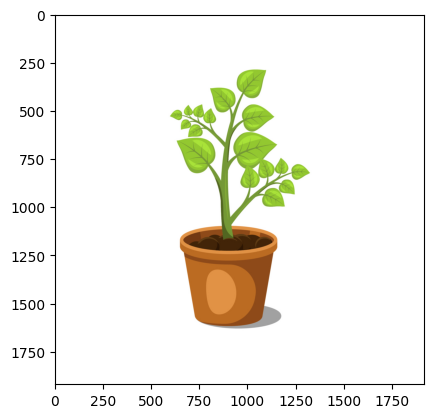

In [3]:
img = cv2.imread('pot.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

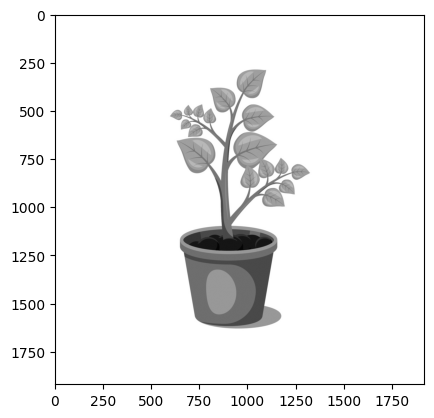

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # grayscale image
plt.imshow(gray, cmap='gray')

### Sobel Filter

In [5]:
sobel_h_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # horizontal kernel
sobel_v_kernel= np.array([[-1,-2,-1], [0,0,0], [1,2,1]]) # vertical kernel

In [6]:
sobel_h = convolve(gray, sobel_h_kernel)
sobel_v = convolve(gray, sobel_v_kernel)

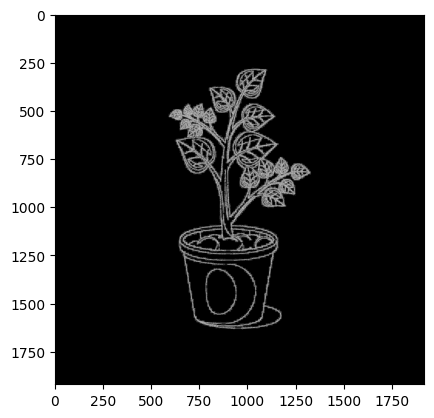

In [7]:
sobel = np.sqrt(sobel_h**2 + sobel_v**2) # combining edges detected
plt.imshow(sobel, cmap='gray')

### Scharr Filter

In [8]:
scharr_h_kernel = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]]) # horizontal kernel
scharr_v_kernel = np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]]) # vertical kernel

In [9]:
scharr_h = convolve(gray, scharr_h_kernel)
scharr_v = convolve(gray, scharr_v_kernel)

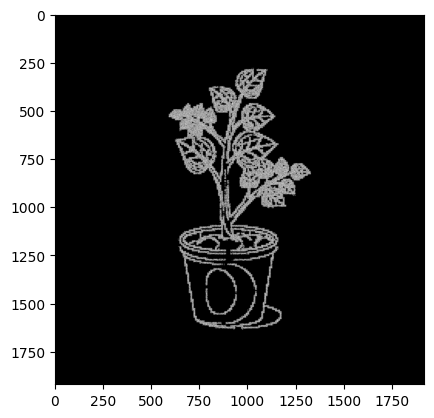

In [10]:
scharr = np.sqrt(scharr_h**2 + scharr_v**2) # combining edges detected
plt.imshow(scharr, cmap = 'gray')

### Prewitt Filter

In [11]:
prewitt_h_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) # horizontal kernel
prewitt_v_kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]) # vertical kernel

In [12]:
prewitt_h = convolve(gray, prewitt_h_kernel)
prewitt_v = convolve(gray, prewitt_v_kernel)

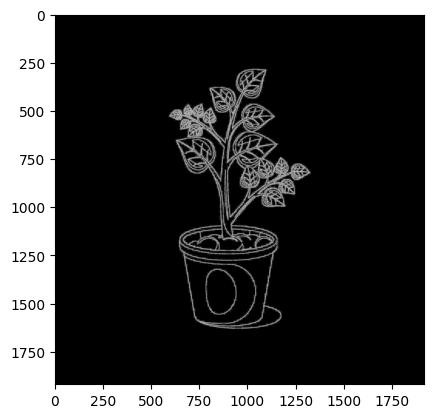

In [13]:
prewitt = np.sqrt(prewitt_h**2 + prewitt_v**2) # combining edges detected
plt.imshow(prewitt, cmap = 'gray')

Comparing Results

Text(0.5, 1.0, 'Prewitt')

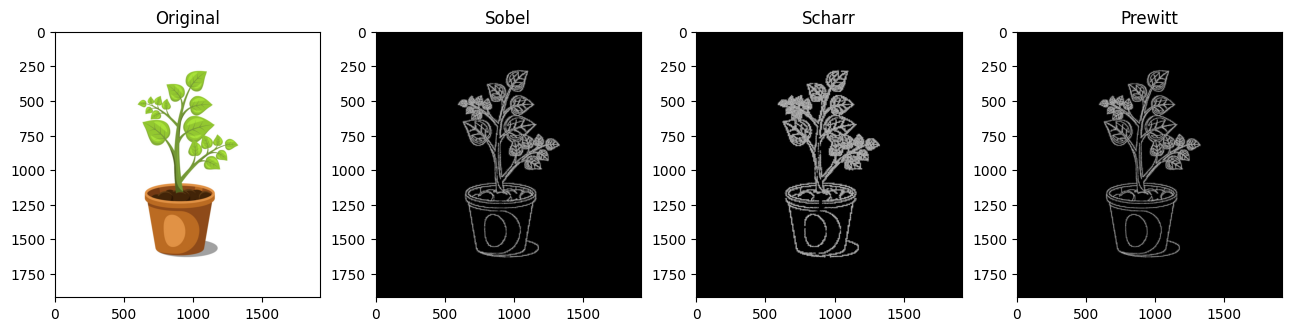

In [16]:
# plotting all images together
plt.figure(figsize=(20, 20))

plt.subplot(5, 5, 1)
plt.imshow(img)
plt.title('Original')

plt.subplot(5, 5, 2)
plt.imshow(sobel, cmap = 'gray')
plt.title('Sobel')

plt.subplot(5, 5, 3)
plt.imshow(scharr, cmap = 'gray')
plt.title('Scharr')

plt.subplot(5, 5, 4)
plt.imshow(prewitt, cmap = 'gray')
plt.title('Prewitt')